# India Air Polution - Data Visualisation and Analysis

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [49]:
airData = pd.read_csv('../Data/AirData.csv')
airData.head()

,City,datemon,PM2.5,NO,NO2,CO,SO2,O3,AQI,AQI Bucket
0,Ahmedabad,01-01-2018,88.851290,33.074194,141.646774,33.074194,109.395807,51.065161,692.166667,Severe
1,Ahmedabad,01-02-2018,102.198519,57.090000,155.731852,57.090000,120.838846,42.121481,932.000000,Severe
2,Ahmedabad,01-03-2018,97.916129,34.509032,114.696452,34.509032,92.539355,48.057931,781.225806,Severe
3,Ahmedabad,01-04-2018,81.731667,22.618667,61.712667,22.618667,51.413000,43.900345,556.266667,Severe
4,Ahmedabad,01-05-2018,53.551935,12.283548,33.376129,12.283548,68.981613,32.981600,322.896552,Very Poor


## Univariate Analysis

<AxesSubplot:xlabel='PM2.5', ylabel='Count'>

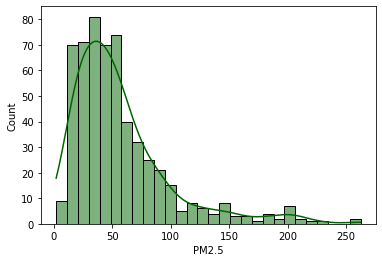

In [50]:
sns.histplot(airData["PM2.5"],color='darkGreen', kde=True) 

<font color='brown'><font size='4'>***Observation based on PM2.5***</font>
* Scientific studies have linked increases in daily PM2.5 exposure with increased respiratory 
and cardiovascular hospital admissions, emergency department visits and deaths. Standard PM2.5 allowable limit is 60-80.
* On analyzing data could infer most of the cities in India are with moderate air quality and few cities are
beyod the allowable limits.

<AxesSubplot:xlabel='AQI', ylabel='Count'>

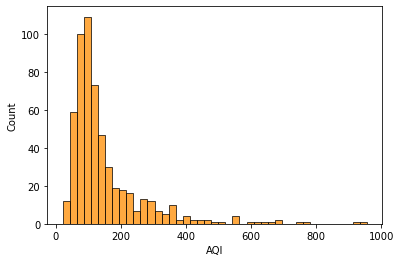

In [51]:
sns.histplot(airData["AQI"],color='darkorange') 

<font color='brown'><font size='4'>***Observation based on AQI (Air Quality Index)***</font>
* The AirQuality Index entries for most of the Cities(on an Average) under observation can be inferred to be between 50 to 200.
* From this observation we can infer that most cites in India Air quality is Moderate.

<AxesSubplot:xlabel='AQI Bucket', ylabel='count'>

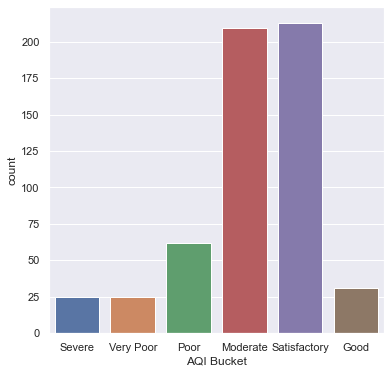

In [52]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x=airData["AQI Bucket"]) 

<font color='brown'><font size='4'>***Observation based on AQI Bucket***</font>
* Most of Indian cites have Moderate and Satisfactory Air Quality.

<AxesSubplot:xlabel='PM2.5', ylabel='Count'>

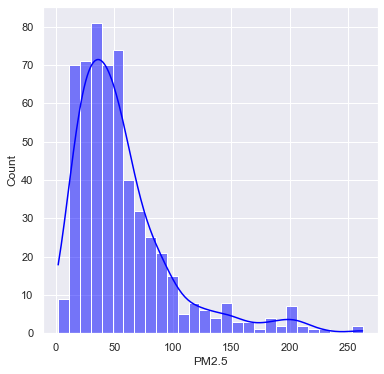

In [53]:
sns.histplot(airData["PM2.5"],color='blue', kde=True) 

<font color='orange'><font size='6'>***Bivariate Analysis***</font>

<AxesSubplot:xlabel='AQI', ylabel='City'>

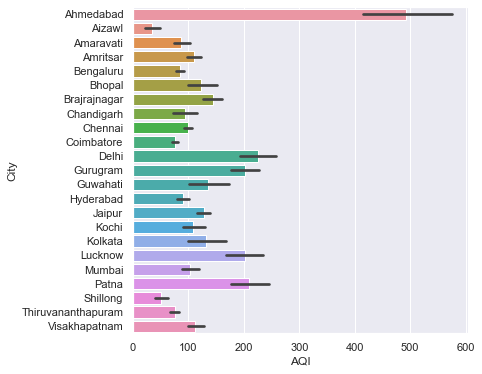

In [54]:
sns.barplot(x='AQI', y='City', data=airData )

<font color='blue'><font size='4'>***Observation from barplot of City and AQI***</font>
* Ahmedabad shows it as Severe and lot lower Air quality compared to the other 22 cities under observation of AQI while Aizawl has the higest Air quality considering the data collected.

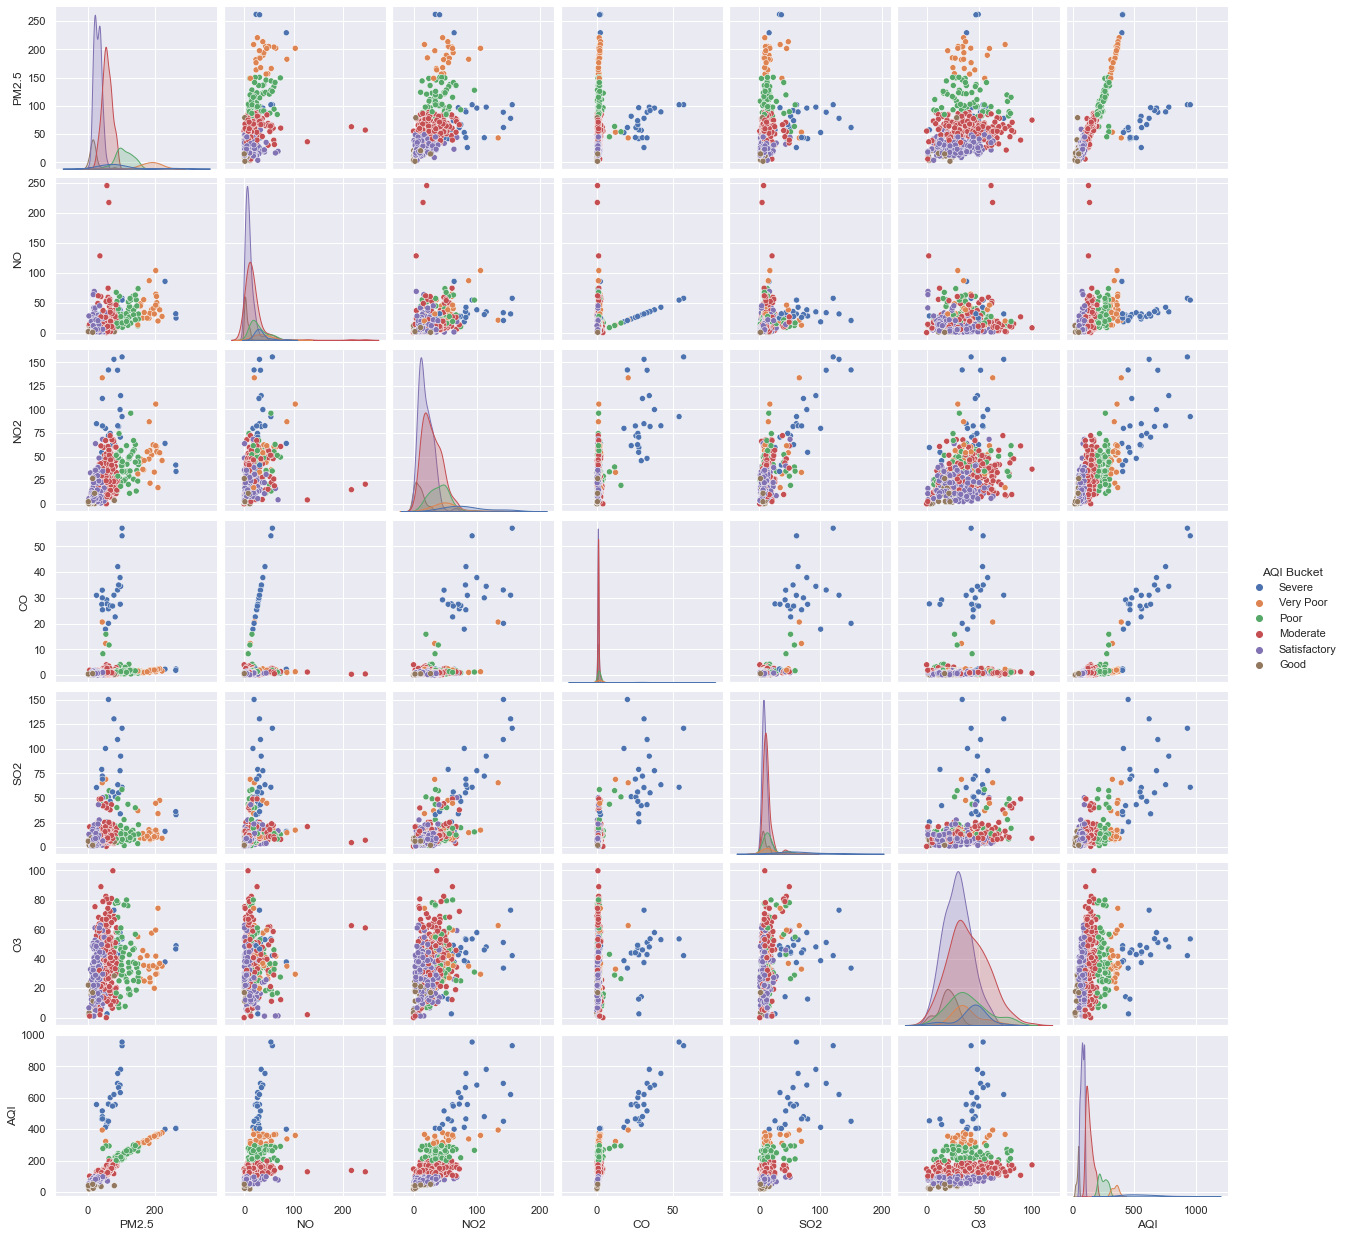

In [55]:
airDataFilter = ['PM2.5','NO','NO2','CO','SO2','O3','AQI']
airData[airDataFilter]
sns.pairplot(airData, hue='AQI Bucket')

<AxesSubplot:>

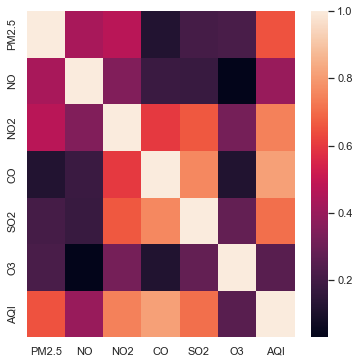

In [56]:
corelationData=airData.corr()
corelationData.head()
sns.heatmap(corelationData)

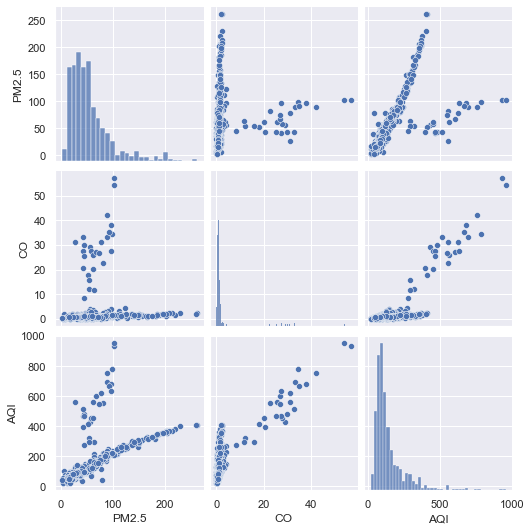

In [57]:
airDataSubFilter = ['PM2.5','CO','AQI']
airData[airDataSubFilter]
sns.pairplot(airData[airDataSubFilter])

<font color='blue'><font size='4'>***Observation based on PM2.5,CO,AQI***</font>
* Increase in PM2.5 and CO are one of the marjor factor in increase in Air Quality Index (AQI). Thus increase in PM2.5 and CO more air is poluted.
* To improve air quality emission of PM2.5 and CO should be reduced.

<AxesSubplot:xlabel='year', ylabel='AQI'>

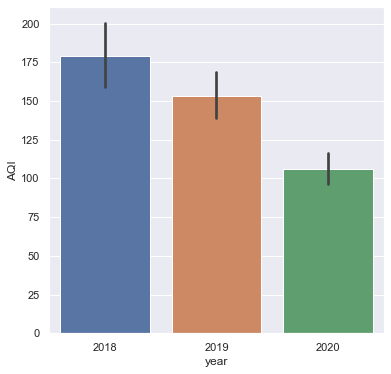

In [58]:
yr = airData["datemon"].str.split("-", n = 2, expand = True)
airData["year"] =yr[2]
sns.barplot(x='year', y='AQI',  data=airData)


<font color='blue'><font size='4'>***Observation on AQI and year***</font>
    
    * On comparing to 2018 and 2019 AQI reduced in 2020, One of the reason might be lockdown in India due to pandemic. Many vechiles and industry was not in operation.

<font color='Green'><font size='4'>***Multivariate Analysis of AQI of Aizawl and Ahmedabad (With best and worst air Quality respectively)***</font>

<AxesSubplot:xlabel='City', ylabel='AQI'>

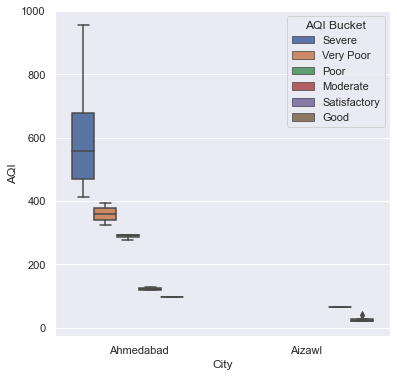

In [59]:
ahmedabad_city = airData[airData.City.eq('Ahmedabad')]
aizawl_city = airData[airData.City.eq('Aizawl')]
ad_City= pd.merge(ahmedabad_city, aizawl_city, how='outer')
sns.boxplot(x='City', y='AQI', hue='AQI Bucket', data=ad_City)

<font color='green'><font size='4'>***Observation on AQI Bucket of Ahmedabad and Aizawl over three years- 2018,2019 and 2020***</font>
    
* Aizawl has AQI as Good and Satisfactory while Ahmedabad is aligning more towards Severe

In [60]:
airData.head()

,City,datemon,PM2.5,NO,NO2,CO,SO2,O3,AQI,AQI Bucket,year
0,Ahmedabad,01-01-2018,88.851290,33.074194,141.646774,33.074194,109.395807,51.065161,692.166667,Severe,2018
1,Ahmedabad,01-02-2018,102.198519,57.090000,155.731852,57.090000,120.838846,42.121481,932.000000,Severe,2018
2,Ahmedabad,01-03-2018,97.916129,34.509032,114.696452,34.509032,92.539355,48.057931,781.225806,Severe,2018
3,Ahmedabad,01-04-2018,81.731667,22.618667,61.712667,22.618667,51.413000,43.900345,556.266667,Severe,2018
4,Ahmedabad,01-05-2018,53.551935,12.283548,33.376129,12.283548,68.981613,32.981600,322.896552,Very Poor,2018


In [61]:
var=airData.groupby(['year','City'])[['AQI']].mean()
#print(var.sort_values(by=['year','AQI','City']))
flat=var.reset_index()

df2018=flat.loc[flat['year']==('2018')]
df2018=df2018.sort_values(by=['year','AQI','City'])
df2019=flat.loc[flat['year']==('2019')]
df2019=df2019.sort_values(by=['year','AQI','City'])
df2020=flat.loc[flat['year']==('2020')]
df2020=df2020.sort_values(by=['year','AQI','City'])

print('\033[1m'+"2018 Top 3 Cities with good Air Quality "+'\033[1m')
print(df2018.head(3))
print(" ********************************************* ")
print("2018 Top 3 Cities with poor Air Quality ")
print(df2018.tail(3))
print()
print("-------------------------------------------------------------------------------------- ")
print("2019 Top 3 Cities with good Air Quality ")
print(df2019.head(3))
print(" ********************************************* ")
print("2019 Top 3 Cities with poor Air Quality ")
print(df2019.tail(3))
print()
print("------------------------------------------------------------------- ")
print("2020 Top 3 Cities with good Air Quality ")
print(df2020.head(3))
print(" ********************************************* ")
print("2020 Top 3 Cities with poor Air Quality ")
print(df2020.tail(3))



2018 Top 3 Cities with good Air Quality 
    year                City        AQI
14  2018  Thiruvananthapuram  83.435505
3   2018           Bengaluru  86.264446
8   2018           Hyderabad  97.572414
 ********************************************* 
2018 Top 3 Cities with poor Air Quality 
    year       City         AQI
13  2018      Patna  234.740788
6   2018      Delhi  249.380204
0   2018  Ahmedabad  624.512397

-------------------------------------------------------------------------------------- 
2019 Top 3 Cities with good Air Quality 
    year                City        AQI
34  2019            Shillong  41.782540
35  2019  Thiruvananthapuram  75.248398
24  2019          Coimbatore  76.387074
 ********************************************* 
2019 Top 3 Cities with poor Air Quality 
    year       City         AQI
33  2019      Patna  217.987186
25  2019      Delhi  232.183698
16  2019  Ahmedabad  515.720753

------------------------------------------------------------------- 
2020 

<font color='green'><font size='4'>***Inferences on AirData***</font>
 1) In all cities the air quality has been improved over the period of three years from 2018 to 2020. This is due to pandemic lockdown and lesser social movement might be a reason.
    
 2) Pollution control measures must be taken in Gurugram, Patna, Delhi, Ahmedabad. Beacuse from 2018 to 2020 these cities records more AQI.

 3) Cities like Shillong, Thiruvananthapuram, Coimbatore, Bengaluru, Hyderabad, Aizawl, Amaravati records polution free zones.
    
 4) Emission of CO, PM2.5 are major influcing factor in increasing AQI, Thus measure to control CO and PM2.5 should be taken.

In [62]:
airData.head()

,City,datemon,PM2.5,NO,NO2,CO,SO2,O3,AQI,AQI Bucket,year
0,Ahmedabad,01-01-2018,88.851290,33.074194,141.646774,33.074194,109.395807,51.065161,692.166667,Severe,2018
1,Ahmedabad,01-02-2018,102.198519,57.090000,155.731852,57.090000,120.838846,42.121481,932.000000,Severe,2018
2,Ahmedabad,01-03-2018,97.916129,34.509032,114.696452,34.509032,92.539355,48.057931,781.225806,Severe,2018
3,Ahmedabad,01-04-2018,81.731667,22.618667,61.712667,22.618667,51.413000,43.900345,556.266667,Severe,2018
4,Ahmedabad,01-05-2018,53.551935,12.283548,33.376129,12.283548,68.981613,32.981600,322.896552,Very Poor,2018


In [63]:
cities_states=pd.read_csv('../data/Indian_city_state_map.csv')
cities_states.head()


,city,states
0,Ahmedabad,Gujarat
1,Aizawl,Mizoram
2,Amaravati,Andhra Pradesh
3,Amritsar,Punjab
4,Bengaluru,Karnataka


In [64]:
df2020.head()

,year,City,AQI
38,2020,Aizawl,33.927790
57,2020,Shillong,56.421018
39,2020,Amaravati,59.006791
58,2020,Thiruvananthapuram,63.007871
44,2020,Chandigarh,70.582631


In [65]:
newData=df2020.merge(cities_states, left_on='City' , right_on='city')
newData.head()

,year,City,AQI,city,states
0,2020,Aizawl,33.927790,Aizawl,Mizoram
1,2020,Shillong,56.421018,Shillong,Meghalaya
2,2020,Amaravati,59.006791,Amaravati,Andhra Pradesh
3,2020,Thiruvananthapuram,63.007871,Thiruvananthapuram,Kerala
4,2020,Chandigarh,70.582631,Chandigarh,Chandigarh


In [66]:
import plotly.graph_objects as go
df = pd.read_csv("https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/active_cases_2020-07-17_0800.csv")


In [70]:

fig = go.Figure(data=go.Choropleth(
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locationmode='geojson-id',
    locations=newData['states'],
    z=newData['AQI'],
    autocolorscale=False,
    colorscale='Reds',
    marker_line_color='peachpuff',

    colorbar=dict(
        title={'text': "AQI"},

        thickness=15,
        len=0.35,
        bgcolor='rgba(255,255,255,0.6)',

        tick0=0,
        dtick=20000,

        xanchor='left',
        x=0.01,
        yanchor='bottom',
        y=0.05
    )
))

fig.update_geos(
    visible=False,
    projection=dict(
        type='conic conformal',
        parallels=[12.472944444, 35.172805555556],
        rotation={'lat': 24, 'lon': 80}
    ),
    lonaxis={'range': [68, 98]},
    lataxis={'range': [6, 38]}
)

fig.update_layout(
    title=dict(
        text="Air Quality in India by State as of 2020",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 10}
    ),
    margin={'r': 0, 't': 30, 'l': 0, 'b': 0},
    height=550,
    width=550
)
fig.show()